# Enterovirus D68 data extraction and cleaining

In [1]:
# import packages
import os
import scrubbing
import pandas as pd
from datetime_funcs import str_date_to_year_fraction

# 1. Obtaining NCBI EvD68 data, filtering it and formating it.
## 1.2 Download Enterovirus D68 samples from NCBI

* Navigate to https://www.ncbi.nlm.nih.gov/labs/virus/vssi/#/virus?SeqType_s=Nucleotide

### 1.2.1 Download sequence fasta format.
* Scroll down and refine search to 'Enterovirus D68' and samples isolated from humans.

![title](reference_images/./ref_image1.png)

* To download sequences click download and select nucleotide sequence in fasta format.

![title](reference_images/./ref_image2.png)

* Select all records.

![title](reference_images/./ref_image3.png)

* Check your downloads folder you should see a new file called 'sequences.fasta'.
* Rename 'sequences.fasta' to 'NCBI_EvD68.fasta' and move it to your working directory placing it into a folder called data.

### 1.2.2 Download metadata as csv.

* Click download and select csv.

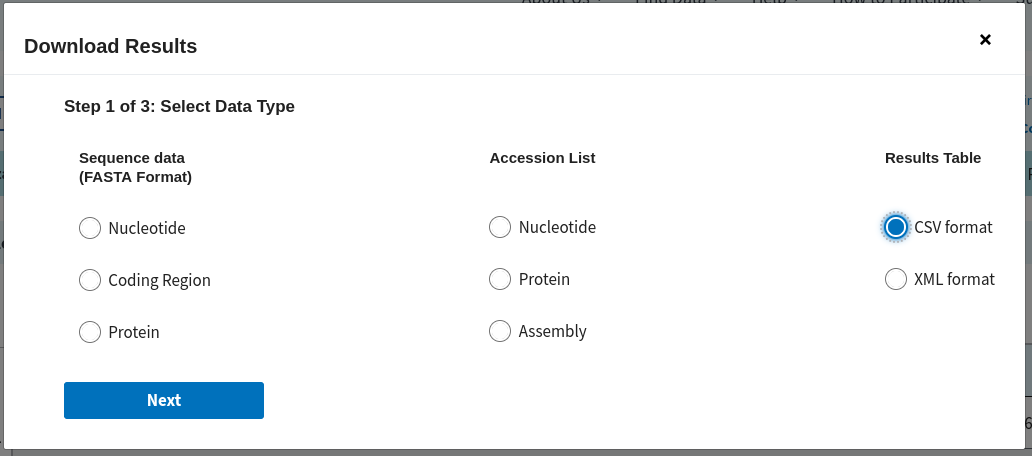

* As before select all records.
* Edit downloaded metadata before selecting to download

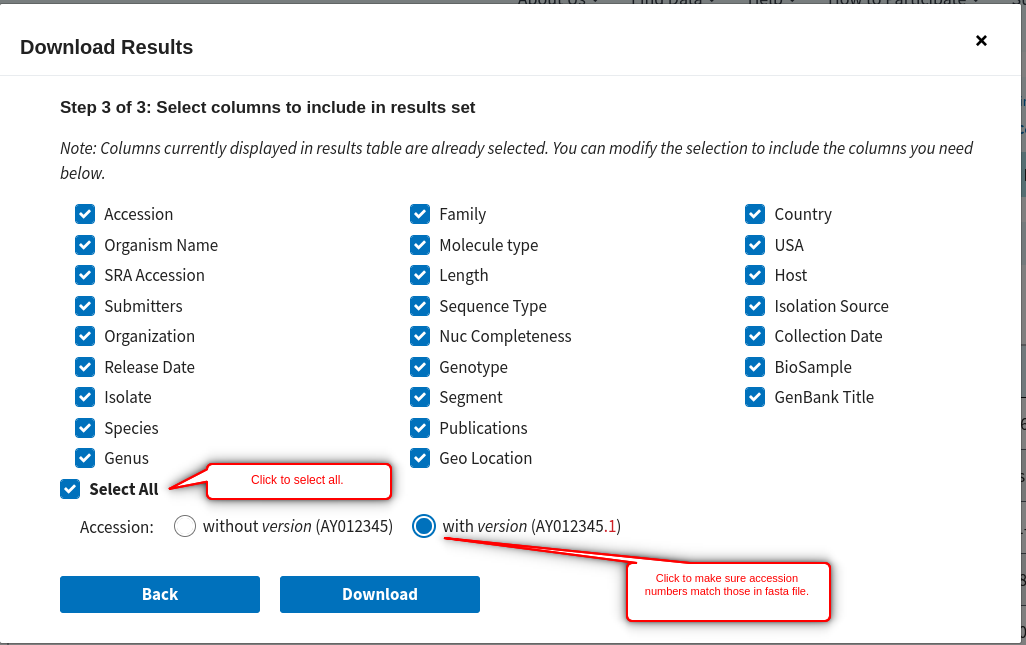

* Check your downloads folder you should see a new file called 'sequences.csv'.
* Rename 'sequences.csv' to 'NCBI_EvD68_metadata.csv' and move it to your working directory placing it into a folder called data.

## 1.3 Cleaning \& Formating NCBI downloads

### 1.3.1 Filtering out based on metadata.

In [2]:
# set data directory
data_dir = 'data'
# set WGS analysis directory
analysis_dir = 'WGS_analysis'
# set metadata file
metadata_file = data_dir + '/NCBI_EvD68_metadata.csv'
# set sequnces file
input_fasta_file = data_dir + '/NCBI_EvD68.fasta'
cleaned_fasta_file = data_dir + '/cleaned_NCBI_EvD68.fasta'

In [3]:
metadata = pd.read_csv(metadata_file)
metadata

,Accession,Organism_Name,SRA_Accession,Submitters,Organization,Org_location,Release_Date,Isolate,Species,Genus,...,Segment,Publications,Geo_Location,Country,USA,Host,Isolation_Source,Collection_Date,BioSample,GenBank_Title
0,OQ791518.1,enterovirus D68,SRR23866022,"Sereewit,J., Hajian,P., Xie,H., Greninger,A.L.","UW Virology, Laboratory Medicine",USA,2023-05-09T00:00:00Z,EV-D68/USA/4E1/2009,Enterovirus D,Enterovirus,...,NaN,NaN,USA,USA,NaN,Homo sapiens,NaN,2009-09,SAMN33761317,"Enterovirus D68 isolate EV-D68/USA/4E1/2009, c..."
1,OQ791519.1,enterovirus D68,SRR23865917,"Sereewit,J., Hajian,P., Xie,H., Greninger,A.L.","UW Virology, Laboratory Medicine",USA,2023-05-09T00:00:00Z,EV-D68/USA/4G4/2009,Enterovirus D,Enterovirus,...,NaN,NaN,USA,USA,NaN,Homo sapiens,NaN,2009-09,SAMN33761402,"Enterovirus D68 isolate EV-D68/USA/4G4/2009, c..."
2,OQ737941.1,enterovirus D68,NaN,"Rudy,M.J., Frost,J., Clarke,P., Tyler,K.L., Ph...","Wadsworth Center, Laboratory of Viral Diseases",USA,2023-04-22T00:00:00Z,USA/NY/2016-33474,Enterovirus D,Enterovirus,...,NaN,1.0,USA: NY,USA,NY,Homo sapiens,oronasopharynx,2016-07-15,NaN,Enterovirus D68 isolate USA/NY/2016-33474 poly...
3,OQ553811.1,enterovirus D68,NaN,"Perederiy,A., Aivazyan,I., Polyakova,V., Lupar...","Smorodintsev Research Institute of Influenza, ...",Russia,2023-03-22T00:00:00Z,EV-D68/Russia/MOW-RII-MH124611/2022,Enterovirus D,Enterovirus,...,NaN,NaN,Russia: Moscow,Russia,NaN,Homo sapiens,oronasopharynx,2022-07-19,NaN,Enterovirus D68 isolate EV-D68/Russia/MOW-RII-...
4,OQ589870.1,enterovirus D68,NaN,"Schuffenecker,I., Stefic,K., Jeannoel,M., Sema...","Hopital Croix-Rousse, Centre National de Refer...",France,2023-03-22T00:00:00Z,TOUR-NP-21-E0-415-FRA21,Enterovirus D,Enterovirus,...,NaN,NaN,France: Tours,France,NaN,Homo sapiens,oronasopharynx,2021-11-02,NaN,Enterovirus D68 isolate TOUR-NP-21-E0-415-FRA2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,GU933069.1,Human rhinovirus 87,NaN,"de Almeida,M.B., Zerbinati,R.M., Tateno,A.F., ...",Instituto de Medicina Tropical de Sao Paulo - ...,Brasil,2010-04-20T00:00:00Z,VFC177,Enterovirus D,Enterovirus,...,NaN,1.0,Brazil,Brazil,NaN,Homo sapiens,NaN,2007-03-07,NaN,Human rhinovirus 87 isolate VFC177 5' UTR
4902,GU933070.1,Human rhinovirus 87,NaN,"de Almeida,M.B., Zerbinati,R.M., Tateno,A.F., ...",Instituto de Medicina Tropical de Sao Paulo - ...,Brasil,2010-04-20T00:00:00Z,VFC179,Enterovirus D,Enterovirus,...,NaN,1.0,Brazil,Brazil,NaN,Homo sapiens,NaN,2007-03-07,NaN,Human rhinovirus 87 isolate VFC179 5' UTR
4903,GU933077.1,Human rhinovirus 87,NaN,"de Almeida,M.B., Zerbinati,R.M., Tateno,A.F., ...",Instituto de Medicina Tropical de Sao Paulo - ...,Brasil,2010-04-20T00:00:00Z,VFC202,Enterovirus D,Enterovirus,...,NaN,1.0,Brazil,Brazil,NaN,Homo sapiens,NaN,2007-03-26,NaN,Human rhinovirus 87 isolate VFC202 5' UTR
4904,AF442690.1,enterovirus D68,NaN,"Mengistu,A., Lynne,M.L., Fox,J.D.","University of Wales College of Medicine, Medic...",United Kingdom,2001-11-25T00:00:00Z,NaN,Enterovirus D,Enterovirus,...,NaN,NaN,NaN,NaN,NaN,Homo sapiens,NaN,NaN,NaN,"Human enterovirus 68 polyprotein gene, partial..."


In [4]:
# Check that all entried pertain to samples from human hosts.
metadata.Host.value_counts()

Homo sapiens    4906
Name: Host, dtype: int64

## Removing unwanted samples
### Creating a list of accession numbers to remove.

#### Human rhinovirus 87 samples

In [5]:
# Check that all entried pertain to enterovirus D68.
metadata.Organism_Name.value_counts()

enterovirus D68        4902
Human rhinovirus 87       4
Name: Organism_Name, dtype: int64

In [6]:
# Get accession numbers for 'Human rhinovirus 87' samples
accession_nums_to_remove = metadata.Accession[metadata.Organism_Name!='enterovirus D68'].to_list()
accession_nums_to_remove 

['GU933068.1', 'GU933069.1', 'GU933070.1', 'GU933077.1']

#### Samples with no collection date

In [7]:
# Look at samples with na values for collection date
metadata[metadata.Collection_Date.isna()]

,Accession,Organism_Name,SRA_Accession,Submitters,Organization,Org_location,Release_Date,Isolate,Species,Genus,...,Segment,Publications,Geo_Location,Country,USA,Host,Isolation_Source,Collection_Date,BioSample,GenBank_Title
2820,LT745914.1,enterovirus D68,NaN,"Bisseux Maxime,B.M., Colombet Jonathan,C.J., M...","Epie ea4843, Universite auvergne, 28 Place Hen...",France,2017-06-02T00:00:00Z,NaN,Enterovirus D,Enterovirus,...,NaN,NaN,France:Clermont-Ferrand,France,NaN,Homo sapiens,NaN,NaN,NaN,Enterovirus D68 partial 1D gene for VP1 protei...
2821,LT745915.1,enterovirus D68,NaN,"Bisseux Maxime,B.M., Colombet Jonathan,C.J., M...","Epie ea4843, Universite auvergne, 28 Place Hen...",France,2017-06-02T00:00:00Z,NaN,Enterovirus D,Enterovirus,...,NaN,NaN,France:Clermont-Ferrand,France,NaN,Homo sapiens,NaN,NaN,NaN,Enterovirus D68 partial 1D gene for VP1 protei...
3665,LC101497.1,enterovirus D68,NaN,"Tsutsui,R., Musashi,M., Saka,K.",Prefectural and municipal public health instit...,Japan,2015-12-01T00:00:00Z,NaN,Enterovirus D,Enterovirus,...,NaN,NaN,Japan:Aomori,Japan,NaN,Homo sapiens,NaN,NaN,NaN,Enterovirus D68 VP1 gene for VP1 capsid protei...
3666,LC101498.1,enterovirus D68,NaN,"Tsutsui,R., Musashi,M., Saka,K.",Prefectural and municipal public health instit...,Japan,2015-12-01T00:00:00Z,NaN,Enterovirus D,Enterovirus,...,NaN,NaN,Japan:Aomori,Japan,NaN,Homo sapiens,NaN,NaN,NaN,"Enterovirus D68 VP4/VP2 gene for polyprotein, ..."
3667,LC101499.1,enterovirus D68,NaN,"Tsutsui,R., Musashi,M., Saka,K.",Prefectural and municipal public health instit...,Japan,2015-12-01T00:00:00Z,NaN,Enterovirus D,Enterovirus,...,NaN,NaN,Japan:Aomori,Japan,NaN,Homo sapiens,NaN,NaN,NaN,"Enterovirus D68 VP4/VP2 gene for polyprotein, ..."
3692,KT803589.1,enterovirus D68,NaN,"Xiao,Q., Zheng,S., Wang,L., Ren,L., Liu,E.",Children's Hospital of Chongqing Medical Unive...,China,2015-11-24T00:00:00Z,CHN/CQ2860/2012,Enterovirus D,Enterovirus,...,NaN,NaN,China,China,NaN,Homo sapiens,NaN,NaN,NaN,Enterovirus D68 isolate CHN/CQ2860/2012 polypr...
3963,KT725431.1,enterovirus D68,NaN,"Das,S.R., Halpin,R.A., Lin,X., Akopov,A., Fedo...",J. Craig Venter Institute,USA,2015-10-03T00:00:00Z,EVD68/Homo sapiens/XXX/ATCC VR-1197/XXXX,Enterovirus D,Enterovirus,...,NaN,NaN,NaN,NaN,NaN,Homo sapiens,NaN,NaN,NaN,Enterovirus D68 isolate EVD68/Homo sapiens/XXX...
4904,AF442690.1,enterovirus D68,NaN,"Mengistu,A., Lynne,M.L., Fox,J.D.","University of Wales College of Medicine, Medic...",United Kingdom,2001-11-25T00:00:00Z,NaN,Enterovirus D,Enterovirus,...,NaN,NaN,NaN,NaN,NaN,Homo sapiens,NaN,NaN,NaN,"Human enterovirus 68 polyprotein gene, partial..."
4905,AF412375.1,enterovirus D68,NaN,"Clancy,L.E., Craig,M.E., White,P.A., Rawlinson...","The Prince of Wales Hospital, Virology Division",Australia,2001-09-27T00:00:00Z,NaN,Enterovirus D,Enterovirus,...,NaN,1.0,NaN,NaN,NaN,Homo sapiens,NaN,NaN,NaN,"Human enterovirus 68 5' untranslated region, p..."


In [8]:
# Get accession numbers for samples with no collection date.
accession_nums_to_remove += metadata.Accession[metadata.Collection_Date.isna()].to_list()
accession_nums_to_remove

['GU933068.1',
 'GU933069.1',
 'GU933070.1',
 'GU933077.1',
 'LT745914.1',
 'LT745915.1',
 'LC101497.1',
 'LC101498.1',
 'LC101499.1',
 'KT803589.1',
 'KT725431.1',
 'AF442690.1',
 'AF412375.1']

### Removing unwanted samples from Fasta file

In [9]:
# Remove 'Human rhinovirus 87' samples from fasta file.
scrubbing.remove_if_accession_in_list(input_fasta_file,
                                      cleaned_fasta_file,
                                      accession_nums_to_remove)

### Removing unwanted samples from metadata

In [10]:
# Remove 'Human rhinovirus 87' samples from metadata.
metadata = metadata[metadata.Organism_Name=='enterovirus D68']
# Checked this worked
metadata.Organism_Name.value_counts()

enterovirus D68    4902
Name: Organism_Name, dtype: int64

In [11]:

# Remove samples with no collection date from filefrom fasta file.
scrubbing.remove_if_accession_in_list(input_fasta_file, cleaned_fasta_file,accession_nums_to_remove)
# Remove samples with no collection date from metadata.
metadata = metadata[~metadata.Collection_Date.isna()]
metadata[metadata.Collection_Date.isna()]

,Accession,Organism_Name,SRA_Accession,Submitters,Organization,Org_location,Release_Date,Isolate,Species,Genus,...,Segment,Publications,Geo_Location,Country,USA,Host,Isolation_Source,Collection_Date,BioSample,GenBank_Title


# Adding clade intormation from Reza's data

Reza has provided some WGS EvD68 sequecnes these have clade infomation. A csv has been constructed with this information.

* Merge onto metadata

In [12]:
rezas_metadata_file = 'data/reza_wgs_clades_info.csv'
rezas_metadata = pd.read_csv(rezas_metadata_file)
rezas_metadata.drop(columns='country', inplace=True)
rezas_metadata = rezas_metadata[~rezas_metadata.clade.isna()]
rezas_metadata.drop_duplicates(inplace=True)
rezas_metadata.rename(columns={'Accession': 'Accession_without_decimal'}, inplace=True)

In [13]:
metadata['Accession_without_decimal'] = metadata.Accession.str.split('.').str[0]
metadata = metadata.merge(rezas_metadata, how='left', on='Accession_without_decimal')

# Obtain a reference genome for Enterovirus D68

Many of the ealier entrys in the NCBI virus database do not list the host. As such genomes that could be used as a reference in step 3 are missing from our fasta file and data set. Fall et al (2022) and Eshaghi et al (2017) both use the enterovirus D68 genome with the accession number AY426531.

* Reset the NCBI virus dashboard and select accession number AY426531.


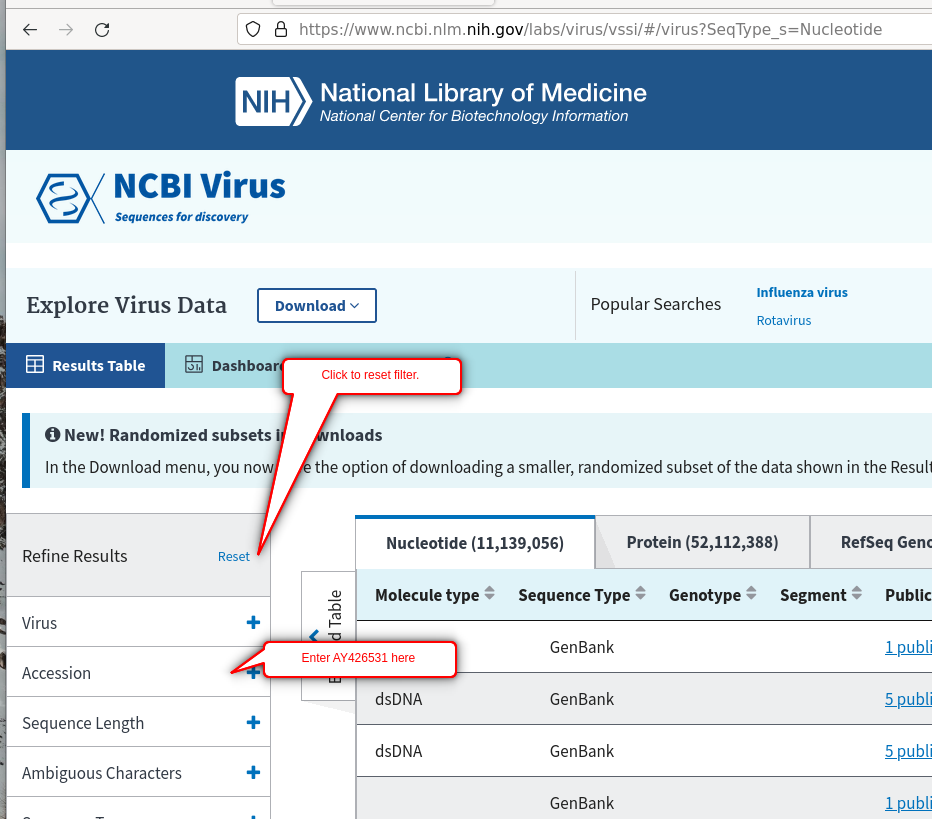

* Download the reference genome sequence as a fasta file and the metadata as csv.
* Relabel reference genome fasta file as ref_EvD68.fasta and move it to your working directory placing it into a folder called data.
* Likewise, relabel reference genome metadata file as ref_EvD68_metadata.csv and move it to your working directory placing it into a folder called data.

In [14]:
# Load reference metadata.
ref_metadata = pd.read_csv(data_dir +'/ref_EvD68_metadata.csv')
ref_metadata

,Accession,Organism_Name,SRA_Accession,Submitters,Organization,Org_location,Release_Date,Isolate,Species,Genus,...,Segment,Publications,Geo_Location,Country,USA,Host,Isolation_Source,Collection_Date,BioSample,GenBank_Title
0,AY426531.1,enterovirus D68,NaN,"Oberste,M.S., Maher,K., Schnurr,D., Flemister,...","Centers for Disease Control and Prevention, Re...",USA,2004-08-18T00:00:00Z,NaN,Enterovirus D,Enterovirus,...,NaN,1,USA,USA,NaN,NaN,NaN,NaN,NaN,"Human enterovirus 68 strain Fermon, complete g..."


In [15]:
# Add 1962 collection date to reference metadata data.
ref_metadata.Collection_Date[0] = '1962'
ref_metadata['Accession_without_decimal'] = metadata.Accession.str.split('.').str[0]
ref_metadata['clade'] = [None]
metadata = pd.concat([ref_metadata,metadata])


/tmp/ipykernel_609942/1599058902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_metadata.Collection_Date[0] = '1962'


### Merge reference faste file with cleaned_fasta_file.

* First we need to get this working directory

In [16]:
working_directory = os.getcwd()
working_directory

'/home/mdgrunnill/Documents/projects/enteriovirus_D68'

* Concatanate ref_EvD68.fasta onto cleaned_NCBI_EvD68.fasta creating data/ref_and_NCBI_EvD68.fasta

In the cell below the header command '%%bash' allows us to run bash commands. Alternatively you can run the bash commands in a terminal.

In [17]:
%%bash
cd /mnt/nfsv4/Labs/Duvvuri/Martins_Project_code/enteriovirus_D68
cat data/ref_EvD68.fasta data/cleaned_NCBI_EvD68.fasta > data/temp.fasta
mv data/temp.fasta data/cleaned_NCBI_EvD68.fasta

In [18]:
# Write cleaned metadata csv.
metadata.to_csv('data/cleaned_EvD68_metadata.csv', index=False)

# Include PHO Sequences

* Selecting PHO sequences and cleaning them

In [19]:
PHO_origin = '/NetDrive/Labs/Duvvuri/PHO_Genomes/Enterovirus_D68/1073_WGS_reza.fasta'
PHO_cleaned = 'data/PHO_WGS_EvD68.fasta'
scrubbing.keep_if_tag_startswith(PHO_origin, PHO_cleaned, '_PHL')
scrubbing.tag_replace_substrings(PHO_cleaned, PHO_cleaned, replacement_dict={'_PHL': 'PHL', 'Canada': 'Canada: On'})
scrubbing.tag_convert_delimiter(PHO_cleaned, PHO_cleaned, delimiter='__', replacement= ' |')
scrubbing.tag_convert_delimiter(PHO_cleaned, PHO_cleaned, delimiter='_', replacement= '|')
scrubbing.seq_replace_substrings(PHO_cleaned, PHO_cleaned, replacement_dict={'-':''})
scrubbing.remove_if_no_date(PHO_cleaned, PHO_cleaned, last_delimiter='|')
scrubbing.tag_convert_date_format(PHO_cleaned, PHO_cleaned, last_delimiter='|', old_format='%m/%d/%Y', new_format='%Y-%m-%d')

* Add PHO sequence limited metadata to our metadata.

In [20]:
fields = ['Accession', 'Geo_Location', 'Collection_Date']
pho_metadata = scrubbing.tag_metadata_to_pandas(PHO_cleaned,fields)
# save PHO metadata
pho_metadata.to_csv('data/PHO_metadata.csv', index=False)
pho_metadata[['Accession', 'Collection_Date']].to_csv('data/PHO_metadata.txt', index=False, sep='\t') # this tab seperated file is needed for tempest


In [21]:
# Remove metadata from PHO fasta file now it is in a csv.
scrubbing.tag_strip_after_delimiter(PHO_cleaned, PHO_cleaned, delimiter=' |')

In [22]:
len(pho_metadata)

87